In [22]:
import qcodes as qc
import numpy as np
import scipy as sc
from matplotlib import pyplot as plt
import itertools as it

import transitions
from importlib import reload
reload(transitions )
from transitions import *

from qcodes.data import hdf5_format
reload(hdf5_format)
h5fmt = hdf5_format.HDF5Format()

In [10]:
data = qc.load_data('CSD/2018-04-11/#014_4D_DC_TGAC_DBL_DBR_19-06-17')
data

# data = qc.load_data('Fast transition tracking data/#009_fast_transition_tracking_DFR_14-22-23')
# # data = qc.load_data('Fast transition tracking data/#016_fast_transition_tracking_DFL_17-23-57')
# data.formatter = h5fmt
# data.read()
# data

DataSet:
   location = 'CSD/2018-04-11/#014_4D_DC_TGAC_DBL_DBR_19-06-17'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | DC_control_DFL_set  | DFL          | (6,)
   Setpoint | DC_control_DFR_set  | DFR          | (6, 6)
   Setpoint | DBL_DBR_set         | DBL_DBR      | (6, 6, 141)
   Setpoint | DC_control_TGAC_set | TGAC         | (6, 6, 141, 81)
   Measured | DC_voltage          | DC_voltage   | (6, 6, 141, 81)

In [11]:
DFL     = data.DC_control_DFL_set
DFR     = data.DC_control_DFR_set[1,:]      
DB      = data.DBL_DBR_set[1,1,:]           
TGAC    = data.DC_control_TGAC_set[1,1,1,:]
Z       = data.DC_voltage
Z       = np.swapaxes(Z,2,3)
Z1 = Z[4,:,:,:]
Z2 = Z[:,4,:,:]
#use 4,i and i,4

# for 4,2 top 2 and bottom 2
# for 4,3 top 2 best, then bottom 2, and middle one
# for 4,4 cut off top, then top 2, and bottom four
# for 4,5 its ok


# DB = data.DBL_DBR_set[1,1,:] #DBL_DBR
# TGAC = data.TGAC_set[1,0:87] #TGAC   
# DFR = data.DC_control_DFR_set[0:85]#DFR    
# Z = data.DC_voltage[0:85,0:87,:]
# Z0 = Z[40,:,:]

#Z[DFL,DFR,DB,TGAC]

{'TG/fast gradient': -7.9166666666666732,
 'TG/slow gradient': 32.598039215686313,
 'fast intercept': 0.76485714285714257,
 'fast/slow gradient': -0.24285714285714274}

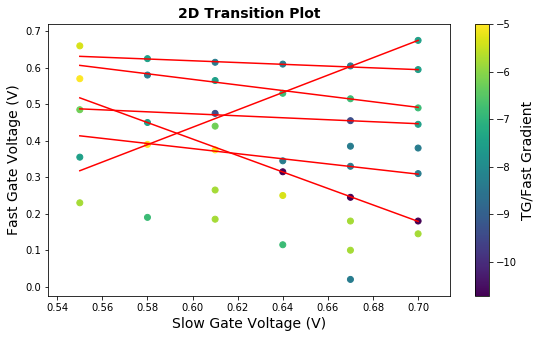

In [26]:
# reload(detect_peaks )
# from detect_peaks import *

trans1 = find_transitions_3D(DFR,DB,TGAC,Z1)
fit1 = track_transitions_multi(DFR,DB,TGAC,Z1,trans1)
plot_transitions_3D(DFR,DB,TGAC,Z1,trans1,fit1)
fit1[0]

{'TG/fast gradient': -8.601866883116891,
 'TG/slow gradient': 7.7694281524926643,
 'fast intercept': 1.2585714285714298,
 'fast/slow gradient': -1.1071428571428588}

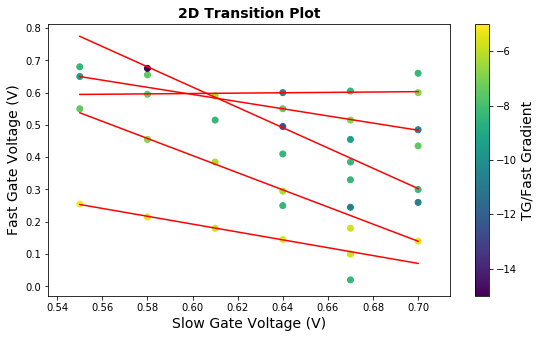

In [27]:
# reload(detect_peaks )
# from detect_peaks import *

trans2 = find_transitions_3D(DFR,DB,TGAC,Z2)
fit2 = track_transitions_multi(DFR,DB,TGAC,Z2,trans2)
plot_transitions_3D(DFR,DB,TGAC,Z2,trans2,fit2)
display(fit2[0])

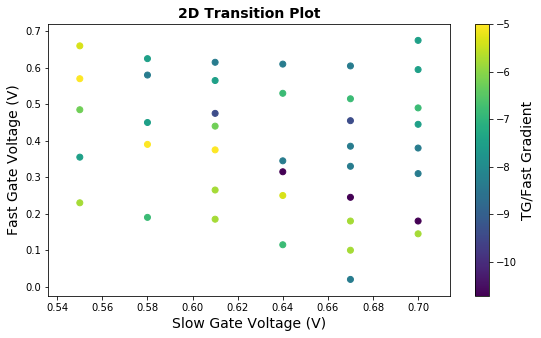

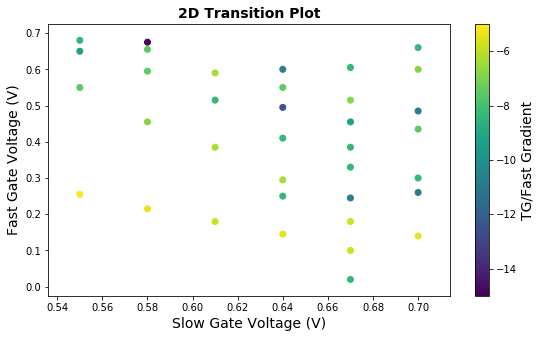

In [28]:
plot_transitions_3D(DFR,DB,TGAC,Z1,trans1)
plot_transitions_3D(DFR,DB,TGAC,Z2,trans2)